In [1]:
import math
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
from IPython import display
from graphviz import Graph

In [2]:
df = pd.read_csv("dataset.csv")
df = df.drop('Unnamed: 0', axis=1)

In [3]:
df

,age,height,job,city,favorite music style
0,30.237071,179.874298,designer,paris,trap
1,27.915796,172.659587,fireman,marseille,hiphop
2,32.205338,181.337491,teacher,paris,metal
3,26.595215,172.337885,designer,toulouse,metal
4,27.394780,182.708030,teacher,paris,metal
...,...,...,...,...,...
195,38.768667,169.293654,developper,madrid,classical
196,32.041409,176.971060,designer,lille,hiphop
197,29.015181,172.990379,developper,paris,classical
198,28.889681,172.776664,painter,toulouse,rap


In [4]:
gr = df.groupby('favorite music style')
trap = gr.get_group('trap').reset_index(drop=True)
hiphop = gr.get_group('hiphop').reset_index(drop=True)
metal = gr.get_group('metal').reset_index(drop=True)
rock = gr.get_group('rock').reset_index(drop=True)
classical = gr.get_group('classical').reset_index(drop=True)
other = gr.get_group('other').reset_index(drop=True)
jazz = gr.get_group('jazz').reset_index(drop=True)
technical_death_metal = gr.get_group('technical death metal').reset_index(drop=True)
rap = gr.get_group('rap').reset_index(drop=True)

trap.mean()

age        29.952662
height    179.762965
dtype: float64

In [5]:
final = ({
    'favorite music style':['trap', 'hiphop', 'metal', 'rock', 'classical', 'other', 'jazz', 'technical death metal', 'rap'],
    'age':[trap.mean()[0], hiphop.mean()[0], metal.mean()[0], rock.mean()[0], classical.mean()[0], other.mean()[0], jazz.mean()[0], technical_death_metal.mean()[0], rap.mean()[0]],
    'height' :[trap.mean()[1], hiphop.mean()[1], metal.mean()[1], rock.mean()[1], classical.mean()[1], other.mean()[1], jazz.mean()[1], technical_death_metal.mean()[1], rap.mean()[1]],
    'city':[trap.mode()['city'][0], hiphop.mode()['city'][0], metal.mode()['city'][0], rock.mode()['city'][0], classical.mode()['city'][0], other.mode()['city'][0], jazz.mode()['city'][0], technical_death_metal.mode()['city'][0], rap.mode()['city'][0]]
})
final_df = pd.DataFrame(final)
final_df

,favorite music style,age,height,city
0,trap,29.952662,179.762965,madrid
1,hiphop,29.666281,178.891742,lille
2,metal,28.020224,180.636279,toulouse
3,rock,30.504460,178.554766,marseille
4,classical,30.317470,179.528053,madrid
5,other,32.095701,178.315570,marseille
6,jazz,29.568198,179.293842,madrid
7,technical death metal,29.528783,178.104764,madrid
8,rap,30.961396,179.193577,toulouse


In [6]:
test = final_df.loc[1][1]
final_df.loc[0]

favorite music style          trap
age                      29.952662
height                  179.762965
city                        madrid
Name: 0, dtype: object

In [7]:
def compute_dissimilarity(style1, style2):
    style1_age = style1.loc['age']
    style2_age = style2.loc['age']

    style1_height = style1.loc['height']
    style2_height = style2.loc['height']

    style1_city = style1.loc['city']
    style2_city = style2.loc['city']

    if style1_city == style2_city:
        dissimilarity_city = 0
    else:
        dissimilarity_city = 1

    # EDIT HERE
    dissimilarity = math.sqrt(
        (style1_age - style2_age)**2 + (style1_height - style2_height)**2 + dissimilarity_city)

    print("----")
    style1_name = style1.loc["favorite music style"]
    style2_name = style2.loc["favorite music style"]
    print(f"style {style1_name}, style {style2_name}, dissimilarity: {dissimilarity}")
    return dissimilarity

In [8]:
dissimilarity_matrix = np.zeros((9, 9))
print('compute dissimilarities')
for s1 in range(9):
    for s2 in range(9):
        dissimilarity = compute_dissimilarity(final_df.loc[s1], final_df.loc[s2])
        dissimilarity_matrix[s1, s2] = dissimilarity

compute dissimilarities
----
style trap, style trap, dissimilarity: 0.0
----
style trap, style hiphop, dissimilarity: 1.356850805298303
----
style trap, style metal, dissimilarity: 2.3445664224940965
----
style trap, style rock, dissimilarity: 1.6625959899973628
----
style trap, style classical, dissimilarity: 0.43389982318054116
----
style trap, style other, dissimilarity: 2.772646927829835
----
style trap, style jazz, dissimilarity: 0.6065384987086745
----
style trap, style technical death metal, dissimilarity: 1.7115210077184067
----
style trap, style rap, dissimilarity: 1.5302769795415487
----
style hiphop, style trap, dissimilarity: 1.356850805298303
----
style hiphop, style hiphop, dissimilarity: 0.0
----
style hiphop, style metal, dissimilarity: 2.5986367065197826
----
style hiphop, style rock, dissimilarity: 1.3476260815943124
----
style hiphop, style classical, dissimilarity: 1.3523828273687037
----
style hiphop, style other, dissimilarity: 2.6896200689706613
----
style hiphop

In [9]:
print("dissimilarity matrix")
print(dissimilarity_matrix)

dissimilarity matrix
[[0.         1.35685081 2.34456642 1.66259599 0.43389982 2.77264693
  0.6065385  1.71152101 1.53027698]
 [1.35685081 0.         2.59863671 1.34762608 1.35238283 2.68962007
  1.08226831 1.27993734 1.66385894]
 [2.34456642 2.59863671 0.         3.39177251 2.73961758 4.79533133
  2.27999137 3.11196307 3.27595482]
 [1.66259599 1.34762608 3.39177251 0.         1.40792462 1.60911901
  1.5565405  1.46780393 1.27156169]
 [0.43389982 1.35238283 2.73961758 1.40792462 0.         2.37322987
  0.78502455 1.62719986 1.23552191]
 [2.77264693 2.68962007 4.79533133 1.60911901 2.37322987 0.
  2.88882108 2.76288093 1.74858359]
 [0.6065385  1.08226831 2.27999137 1.5565405  0.78502455 2.88882108
  0.         1.18973072 1.71786283]
 [1.71152101 1.27993734 3.11196307 1.46780393 1.62719986 2.76288093
  1.18973072 0.         2.05861455]
 [1.53027698 1.66385894 3.27595482 1.27156169 1.23552191 1.74858359
  1.71786283 2.05861455 0.        ]]


In [10]:
threshold = 3
# build a graph from the dissimilarity
dot = Graph(comment='Graph created from complex data',
            strict=True)

for s1 in range(9):
    music = final_df.loc[s1]['favorite music style']
    dot.node(music)

for s1 in range(9):
    for s2 in range(9):
        if not s1 == s2:
            music1 = final_df.loc[s1]['favorite music style']
            music2 = final_df.loc[s2]['favorite music style']
            # use the threshold condition
            if dissimilarity_matrix[s1, s2] > threshold:
                dot.edge(music1,
                         music2,
                         color='darkolivegreen4',
                         penwidth='1.1')

# visualize the graph
dot.attr(label=f"threshold {threshold}", fontsize='20')
graph_name = f"images/complex_data_threshold_{threshold}"
dot.render(graph_name)

'images/complex_data_threshold_3.pdf'

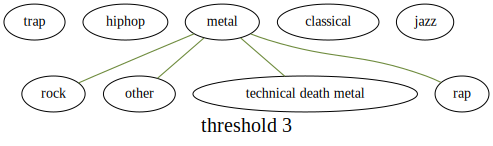

In [11]:
dot

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b68df151-3bbe-41dc-aad9-f2bcf0ea83dd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>